In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report, confusion_matrix


df_football_1819 = pd.read_csv('season-1819_csv.csv')
df_football_1920 = pd.read_csv('season-1920.csv')
print(df_football_1819)
print(df_football_1920) 

    Div        Date      HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0    E0  10/08/2018    Man United       Leicester     2     1   H     1     0   
1    E0  11/08/2018   Bournemouth         Cardiff     2     0   H     1     0   
2    E0  11/08/2018        Fulham  Crystal Palace     0     2   A     0     1   
3    E0  11/08/2018  Huddersfield         Chelsea     0     3   A     0     2   
4    E0  11/08/2018     Newcastle       Tottenham     1     2   A     1     2   
..   ..         ...           ...             ...   ...   ...  ..   ...   ...   
375  E0  12/05/2019     Liverpool          Wolves     2     0   H     1     0   
376  E0  12/05/2019    Man United         Cardiff     0     2   A     0     1   
377  E0  12/05/2019   Southampton    Huddersfield     1     1   D     1     0   
378  E0  12/05/2019     Tottenham         Everton     2     2   D     1     0   
379  E0  12/05/2019       Watford        West Ham     1     4   A     0     2   

    HTR  ... BbAv<2.5  BbAH

In [6]:
df_football_1819 = df_football_1819.filter(items = ['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HR', 'AR'])
df_football_1920 = df_football_1920.filter(items = ['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HR', 'AR'])
print(df_football_1819)
print(df_football_1920)

         HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  HS  AS  \
0      Man United       Leicester     2     1   H     1     0   H   8  13   
1     Bournemouth         Cardiff     2     0   H     1     0   H  12  10   
2          Fulham  Crystal Palace     0     2   A     0     1   A  15  10   
3    Huddersfield         Chelsea     0     3   A     0     2   A   6  13   
4       Newcastle       Tottenham     1     2   A     1     2   A  15  15   
..            ...             ...   ...   ...  ..   ...   ...  ..  ..  ..   
375     Liverpool          Wolves     2     0   H     1     0   H  13   7   
376    Man United         Cardiff     0     2   A     0     1   A  26  13   
377   Southampton    Huddersfield     1     1   D     1     0   H  10  10   
378     Tottenham         Everton     2     2   D     1     0   H  11  17   
379       Watford        West Ham     1     4   A     0     2   A  17  16   

     HST  AST  HC  AC  HR  AR  
0      6    4   2   5   0   0  
1      4   

In [7]:
team_names = df_football_1819.drop_duplicates(subset = ['HomeTeam'])['HomeTeam']
print(team_names)

team_names = np.array(team_names)

print(team_names)

0         Man United
1        Bournemouth
2             Fulham
3       Huddersfield
4          Newcastle
5            Watford
6             Wolves
7            Arsenal
8          Liverpool
9        Southampton
10           Cardiff
11           Chelsea
12           Everton
13         Leicester
14         Tottenham
15          West Ham
16          Brighton
17           Burnley
18          Man City
19    Crystal Palace
Name: HomeTeam, dtype: object
['Man United' 'Bournemouth' 'Fulham' 'Huddersfield' 'Newcastle' 'Watford'
 'Wolves' 'Arsenal' 'Liverpool' 'Southampton' 'Cardiff' 'Chelsea'
 'Everton' 'Leicester' 'Tottenham' 'West Ham' 'Brighton' 'Burnley'
 'Man City' 'Crystal Palace']


In [8]:
## for row in df_football_1819.itertuples():
   ## print(row.HomeTeam)
    

In [9]:
df_football_1819_ManU_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Man United")]
df_football_1819_ManU_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Man United")]

df_football_1819_Bour_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Bournemouth")]
df_football_1819_Bour_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Bournemouth")]

df_football_1819_Ful_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Fulham")]
df_football_1819_Ful_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Fulham")]

df_football_1819_Hud_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Huddersfield")]
df_football_1819_Hud_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Huddersfield")]

df_football_1819_New_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Newcastle")]
df_football_1819_New_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Newcastle")]

df_football_1819_Wat_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Watford")]
df_football_1819_Wat_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Watford")]

df_football_1819_Wol_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Wolves")]
df_football_1819_Wol_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Wolves")]

df_football_1819_Ars_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Arsenal")]
df_football_1819_Ars_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Arsenal")]

df_football_1819_Liv_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Liverpool")]
df_football_1819_Liv_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Liverpool")]

df_football_1819_Sou_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Southampton")]
df_football_1819_Sou_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Southampton")]

df_football_1819_Car_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Cardiff")]
df_football_1819_Car_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Cardiff")]

df_football_1819_Che_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Chelsea")]
df_football_1819_Che_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Chelsea")]

df_football_1819_Eve_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Everton")]
df_football_1819_Eve_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Everton")]

df_football_1819_Lei_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Leicester")]
df_football_1819_Lei_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Leicester")]

df_football_1819_Tot_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Tottenham")]
df_football_1819_Tot_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Tottenham")]

df_football_1819_WHam_home = df_football_1819.loc[(df_football_1819.HomeTeam == "West Ham")]
df_football_1819_WHam_away = df_football_1819.loc[(df_football_1819.AwayTeam == "West Ham")]

df_football_1819_Bton_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Brighton")]
df_football_1819_Bton_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Brighton")]

df_football_1819_Bley_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Burnley")]
df_football_1819_Bley_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Burnley")]

df_football_1819_ManC_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Man City")]
df_football_1819_ManC_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Man City")]

df_football_1819_CP_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Crystal Palace")]
df_football_1819_CP_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Crystal Palace")]

In [10]:
df_football_1920_ManU_home = df_football_1920.loc[(df_football_1920.HomeTeam == "Man United")]
df_football_1920_ManU_away = df_football_1819.loc[(df_football_1920.AwayTeam == "Man United")]

df_football_1920_Bour_home = df_football_1819.loc[(df_football_1920.HomeTeam == "Bournemouth")]
df_football_1819_Bour_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Bournemouth")]

df_football_1819_Ful_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Fulham")]
df_football_1819_Ful_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Fulham")]

df_football_1819_Hud_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Huddersfield")]
df_football_1819_Hud_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Huddersfield")]

df_football_1819_New_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Newcastle")]
df_football_1819_New_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Newcastle")]

df_football_1819_Wat_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Watford")]
df_football_1819_Wat_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Watford")]

df_football_1819_Wol_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Wolves")]
df_football_1819_Wol_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Wolves")]

df_football_1819_Ars_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Arsenal")]
df_football_1819_Ars_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Arsenal")]

df_football_1819_Liv_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Liverpool")]
df_football_1819_Liv_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Liverpool")]

df_football_1819_Sou_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Southampton")]
df_football_1819_Sou_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Southampton")]

df_football_1819_Car_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Cardiff")]
df_football_1819_Car_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Cardiff")]

df_football_1819_Che_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Chelsea")]
df_football_1819_Che_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Chelsea")]

df_football_1819_Eve_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Everton")]
df_football_1819_Eve_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Everton")]

df_football_1819_Lei_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Leicester")]
df_football_1819_Lei_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Leicester")]

df_football_1819_Tot_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Tottenham")]
df_football_1819_Tot_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Tottenham")]

df_football_1819_WHam_home = df_football_1819.loc[(df_football_1819.HomeTeam == "West Ham")]
df_football_1819_WHam_away = df_football_1819.loc[(df_football_1819.AwayTeam == "West Ham")]

df_football_1819_Bton_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Brighton")]
df_football_1819_Bton_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Brighton")]

df_football_1819_Bley_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Burnley")]
df_football_1819_Bley_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Burnley")]

df_football_1819_ManC_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Man City")]
df_football_1819_ManC_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Man City")]

df_football_1819_CP_home = df_football_1819.loc[(df_football_1819.HomeTeam == "Crystal Palace")]
df_football_1819_CP_away = df_football_1819.loc[(df_football_1819.AwayTeam == "Crystal Palace")]

In [11]:
xManUH1819 = np.array(df_football_1819_ManU_home['FTR'])
xManUA1819 = np.array(df_football_1819_ManU_away['FTR'])

yManU1819 = []

for i in xManUH1819:
    if i == 'H':
        yManU1819.append(1)
    elif i == 'A': 
        yManU1819.append(-1)
    elif i == 'D':
        yManU1819.append(0)

        
for i in xManUA1819:
    if i == 'H':
        yManU1819.append(-1)
    elif i == 'A': 
        yManU1819.append(1)
    elif i == 'D':
        yManU1819.append(0)
        
print(xManUH1819)
print(xManUA1819)
print(yManU1819)

['H' 'A' 'D' 'H' 'H' 'D' 'D' 'H' 'H' 'H' 'H' 'D' 'D' 'H' 'H' 'H' 'A' 'D'
 'A']
['H' 'A' 'A' 'H' 'D' 'A' 'H' 'D' 'H' 'A' 'A' 'A' 'A' 'A' 'A' 'H' 'H' 'H'
 'D']
[1, -1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, -1, 0, -1, -1, 1, 1, -1, 0, 1, -1, 0, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 0]


In [12]:
xBourH1819 = np.array(df_football_1819_Bour_home['FTR'])
xBourA1819 = np.array(df_football_1819_Bour_away['FTR'])

yBour1819 = []

for i in xBourH1819:
    if i == 'H':
        yBour1819.append(1)
    elif i == 'A': 
        yBour1819.append(-1)
    elif i == 'D':
        yBour1819.append(0)

        
for i in xBourA1819:
    if i == 'H':
        yBour1819.append(-1)
    elif i == 'A': 
        yBour1819.append(1)
    elif i == 'D':
        yBour1819.append(0)
        
print(xBourH1819)
print(xBourA1819)
print(yBour1819)

['H' 'D' 'H' 'H' 'D' 'A' 'A' 'H' 'A' 'H' 'D' 'H' 'H' 'D' 'A' 'D' 'A' 'A'
 'H']
['A' 'H' 'H' 'A' 'A' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'A' 'H' 'A' 'D'
 'H']
[1, 0, 1, 1, 0, -1, -1, 1, -1, 1, 0, 1, 1, 0, -1, 0, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 0, -1]


In [13]:
xFulH1819 = np.array(df_football_1819_Ful_home['FTR'])
xFulA1819 = np.array(df_football_1819_Ful_away['FTR'])

yFul1819 = []

for i in xFulH1819:
    if i == 'H':
        yFul1819.append(1)
    elif i == 'A': 
        yFul1819.append(-1)
    elif i == 'D':
        yFul1819.append(0)

        
for i in xFulA1819:
    if i == 'H':
        yFul1819.append(-1)
    elif i == 'A': 
        yFul1819.append(1)
    elif i == 'D':
        yFul1819.append(0)
        
print(xFulH1819)
print(xFulA1819)
print(yFul1819)

['A' 'H' 'D' 'A' 'A' 'H' 'D' 'A' 'D' 'H' 'A' 'H' 'A' 'A' 'A' 'A' 'H' 'H'
 'A']
['H' 'D' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'D' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'A'
 'H']
[-1, 1, 0, -1, -1, 1, 0, -1, 0, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, 1, -1]


In [14]:
xHudH1819 = np.array(df_football_1819_Hud_home['FTR'])
xHudA1819 = np.array(df_football_1819_Hud_away['FTR'])

yHud1819 = []

for i in xHudH1819:
    if i == 'H':
        yHud1819.append(1)
    elif i == 'A': 
        yHud1819.append(-1)
    elif i == 'D':
        yHud1819.append(0)

        
for i in xHudA1819:
    if i == 'H':
        yHud1819.append(-1)
    elif i == 'A': 
        yHud1819.append(1)
    elif i == 'D':
        yHud1819.append(0)
        
print(xHudH1819)
print(xHudA1819)
print(yHud1819)

['A' 'D' 'A' 'A' 'A' 'H' 'D' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'H' 'A' 'A' 'A'
 'D']
['H' 'D' 'H' 'D' 'H' 'A' 'H' 'H' 'H' 'H' 'D' 'H' 'H' 'H' 'H' 'H' 'H' 'H'
 'D']
[-1, 0, -1, -1, -1, 1, 0, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 0, -1, 0, -1, 0, -1, 1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, 0]


In [15]:
xNewH1819 = np.array(df_football_1819_New_home['FTR'])
xNewA1819 = np.array(df_football_1819_New_away['FTR'])

yNew1819 = []

for i in xNewH1819:
    if i == 'H':
        yNew1819.append(1)
    elif i == 'A': 
        yNew1819.append(-1)
    elif i == 'D':
        yNew1819.append(0)

        
for i in xNewA1819:
    if i == 'H':
        yNew1819.append(-1)
    elif i == 'A': 
        yNew1819.append(1)
    elif i == 'D':
        yNew1819.append(0)
        
print(xNewH1819)
print(xNewA1819)
print(yNew1819)

['A' 'A' 'A' 'A' 'A' 'H' 'H' 'A' 'A' 'D' 'A' 'H' 'H' 'H' 'H' 'H' 'A' 'H'
 'A']
['D' 'H' 'D' 'H' 'D' 'A' 'D' 'A' 'H' 'D' 'H' 'H' 'D' 'H' 'D' 'H' 'A' 'D'
 'A']
[-1, -1, -1, -1, -1, 1, 1, -1, -1, 0, -1, 1, 1, 1, 1, 1, -1, 1, -1, 0, -1, 0, -1, 0, 1, 0, 1, -1, 0, -1, -1, 0, -1, 0, -1, 1, 0, 1]


In [16]:
xWatH1819 = np.array(df_football_1819_Wat_home['FTR'])
xWatA1819 = np.array(df_football_1819_Wat_away['FTR'])

yWat1819 = []

for i in xWatH1819:
    if i == 'H':
        yWat1819.append(1)
    elif i == 'A': 
        yWat1819.append(-1)
    elif i == 'D':
        yWat1819.append(0)

        
for i in xWatA1819:
    if i == 'H':
        yWat1819.append(-1)
    elif i == 'A': 
        yWat1819.append(1)
    elif i == 'D':
        yWat1819.append(0)
        
print(xWatH1819)
print(xWatA1819)
print(yWat1819)

['H' 'H' 'H' 'A' 'A' 'H' 'A' 'A' 'H' 'A' 'D' 'D' 'H' 'H' 'H' 'A' 'D' 'A'
 'A']
['A' 'D' 'H' 'A' 'H' 'D' 'H' 'D' 'A' 'D' 'A' 'H' 'D' 'A' 'H' 'H' 'H' 'A'
 'H']
[1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 0, 0, 1, 1, 1, -1, 0, -1, -1, 1, 0, -1, 1, -1, 0, -1, 0, 1, 0, 1, -1, 0, 1, -1, -1, -1, 1, -1]


In [17]:
xWolH1819 = np.array(df_football_1819_Wol_home['FTR'])
xWolA1819 = np.array(df_football_1819_Wol_away['FTR'])

yWol1819 = []

for i in xWolH1819:
    if i == 'H':
        yWol1819.append(1)
    elif i == 'A': 
        yWol1819.append(-1)
    elif i == 'D':
        yWol1819.append(0)

        
for i in xWolA1819:
    if i == 'H':
        yWol1819.append(-1)
    elif i == 'A': 
        yWol1819.append(1)
    elif i == 'D':
        yWol1819.append(0)
        
print(xWolH1819)
print(xWolA1819)
print(yWol1819)

['D' 'D' 'H' 'H' 'A' 'A' 'A' 'H' 'H' 'A' 'A' 'H' 'H' 'D' 'H' 'H' 'D' 'H'
 'H']
['H' 'A' 'D' 'A' 'H' 'D' 'H' 'A' 'D' 'A' 'H' 'A' 'D' 'H' 'D' 'H' 'H' 'A'
 'H']
[0, 0, 1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 0, 1, 1, 0, 1, 1, -1, 1, 0, 1, -1, 0, -1, 1, 0, 1, -1, 1, 0, -1, 0, -1, -1, 1, -1]


In [18]:
xArsH1819 = np.array(df_football_1819_Ars_home['FTR'])
xArsA1819 = np.array(df_football_1819_Ars_away['FTR'])

yArs1819 = []

for i in xArsH1819:
    if i == 'H':
        yArs1819.append(1)
    elif i == 'A': 
        yArs1819.append(-1)
    elif i == 'D':
        yArs1819.append(0)

        
for i in xArsA1819:
    if i == 'H':
        yArs1819.append(-1)
    elif i == 'A': 
        yArs1819.append(1)
    elif i == 'D':
        yArs1819.append(0)
        
print(xArsH1819)
print(xArsA1819)
print(yArs1819)

['A' 'H' 'H' 'H' 'H' 'D' 'D' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'A'
 'D']
['H' 'A' 'A' 'A' 'D' 'A' 'D' 'H' 'D' 'H' 'H' 'H' 'A' 'D' 'H' 'A' 'H' 'H'
 'A']
[-1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 0, -1, 1, 1, 1, 0, 1, 0, -1, 0, -1, -1, -1, 1, 0, -1, 1, -1, -1, 1]


In [19]:
xLivH1819 = np.array(df_football_1819_Liv_home['FTR'])
xLivA1819 = np.array(df_football_1819_Liv_away['FTR'])

yLiv1819 = []

for i in xLivH1819:
    if i == 'H':
        yLiv1819.append(1)
    elif i == 'A': 
        yLiv1819.append(-1)
    elif i == 'D':
        yLiv1819.append(0)

        
for i in xLivA1819:
    if i == 'H':
        yLiv1819.append(-1)
    elif i == 'A': 
        yLiv1819.append(1)
    elif i == 'D':
        yLiv1819.append(0)
        
print(xLivH1819)
print(xLivA1819)
print(yLiv1819)

['H' 'H' 'H' 'D' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'D' 'H' 'H' 'H' 'H' 'H' 'H'
 'H']
['A' 'A' 'A' 'D' 'A' 'D' 'A' 'A' 'A' 'A' 'H' 'A' 'D' 'D' 'D' 'A' 'A' 'A'
 'A']
[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, -1, 1, 0, 0, 0, 1, 1, 1, 1]


In [20]:
xSouH1819 = np.array(df_football_1819_Sou_home['FTR'])
xSouA1819 = np.array(df_football_1819_Sou_away['FTR'])

ySou1819 = []

for i in xSouH1819:
    if i == 'H':
        ySou1819.append(1)
    elif i == 'A': 
        ySou1819.append(-1)
    elif i == 'D':
        ySou1819.append(0)

        
for i in xSouA1819:
    if i == 'H':
        ySou1819.append(-1)
    elif i == 'A': 
        ySou1819.append(1)
    elif i == 'D':
        ySou1819.append(0)
        
print(xSouH1819)
print(xSouA1819)
print(ySou1819)

['D' 'A' 'D' 'A' 'D' 'D' 'D' 'H' 'A' 'A' 'H' 'D' 'A' 'H' 'H' 'A' 'H' 'D'
 'D']
['H' 'A' 'H' 'H' 'D' 'H' 'H' 'H' 'H' 'A' 'D' 'A' 'D' 'H' 'H' 'A' 'H' 'D'
 'H']
[0, -1, 0, -1, 0, 0, 0, 1, -1, -1, 1, 0, -1, 1, 1, -1, 1, 0, 0, -1, 1, -1, -1, 0, -1, -1, -1, -1, 1, 0, 1, 0, -1, -1, 1, -1, 0, -1]


In [21]:
xCarH1819 = np.array(df_football_1819_Car_home['FTR'])
xCarA1819 = np.array(df_football_1819_Car_away['FTR'])

yCar1819 = []

for i in xCarH1819:
    if i == 'H':
        yCar1819.append(1)
    elif i == 'A': 
        yCar1819.append(-1)
    elif i == 'D':
        yCar1819.append(0)

        
for i in xCarA1819:
    if i == 'H':
        yCar1819.append(-1)
    elif i == 'A': 
        yCar1819.append(1)
    elif i == 'D':
        yCar1819.append(0)
        
print(xCarH1819)
print(xCarA1819)
print(yCar1819)

['D' 'A' 'A' 'A' 'H' 'A' 'H' 'H' 'H' 'A' 'A' 'D' 'H' 'A' 'A' 'H' 'A' 'A'
 'A']
['H' 'D' 'H' 'H' 'H' 'H' 'H' 'H' 'D' 'A' 'H' 'H' 'A' 'H' 'H' 'H' 'A' 'H'
 'A']
[0, -1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 0, 1, -1, -1, 1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, 0, 1, -1, -1, 1, -1, -1, -1, 1, -1, 1]


In [22]:
xCheH1819 = np.array(df_football_1819_Che_home['FTR'])
xCheA1819 = np.array(df_football_1819_Che_away['FTR'])

yChe1819 = []

for i in xCheH1819:
    if i == 'H':
        yChe1819.append(1)
    elif i == 'A': 
        yChe1819.append(-1)
    elif i == 'D':
        yChe1819.append(0)

        
for i in xCheA1819:
    if i == 'H':
        yChe1819.append(-1)
    elif i == 'A': 
        yChe1819.append(1)
    elif i == 'D':
        yChe1819.append(0)
        
print(xCheH1819)
print(xCheA1819)
print(yChe1819)

['H' 'H' 'H' 'D' 'D' 'H' 'D' 'H' 'H' 'A' 'D' 'H' 'H' 'H' 'D' 'H' 'H' 'D'
 'H']
['A' 'A' 'D' 'A' 'A' 'H' 'H' 'A' 'A' 'A' 'H' 'H' 'H' 'A' 'H' 'A' 'H' 'D'
 'D']
[1, 1, 1, 0, 0, 1, 0, 1, 1, -1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, 1, -1, 0, 0]


In [23]:
xEveH1819 = np.array(df_football_1819_Eve_home['FTR'])
xEveA1819 = np.array(df_football_1819_Eve_away['FTR'])

yEve1819 = []

for i in xEveH1819:
    if i == 'H':
        yEve1819.append(1)
    elif i == 'A': 
        yEve1819.append(-1)
    elif i == 'D':
        yEve1819.append(0)

        
for i in xFulA1819:
    if i == 'H':
        yEve1819.append(-1)
    elif i == 'A': 
        yEve1819.append(1)
    elif i == 'D':
        yEve1819.append(0)
        
print(xEveH1819)
print(xEveA1819)
print(yEve1819)

['H' 'D' 'A' 'H' 'H' 'H' 'H' 'D' 'D' 'A' 'A' 'H' 'A' 'A' 'D' 'H' 'H' 'H'
 'H']
['D' 'D' 'H' 'A' 'H' 'D' 'H' 'H' 'A' 'H' 'H' 'A' 'H' 'A' 'H' 'A' 'H' 'D'
 'D']
[1, 0, -1, 1, 1, 1, 1, 0, 0, -1, -1, 1, -1, -1, 0, 1, 1, 1, 1, -1, 0, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, 1, -1]


In [24]:
xLeiH1819 = np.array(df_football_1819_Lei_home['FTR'])
xLeiA1819 = np.array(df_football_1819_Lei_away['FTR'])

yLei1819 = []

for i in xLeiH1819:
    if i == 'H':
        yLei1819.append(1)
    elif i == 'A': 
        yLei1819.append(-1)
    elif i == 'D':
        yLei1819.append(0)

        
for i in xLeiA1819:
    if i == 'H':
        yLei1819.append(-1)
    elif i == 'A': 
        yLei1819.append(1)
    elif i == 'D':
        yLei1819.append(0)
        
print(xLeiH1819)
print(xLeiA1819)
print(yLei1819)

['H' 'A' 'H' 'A' 'D' 'D' 'H' 'A' 'H' 'A' 'A' 'A' 'A' 'H' 'H' 'H' 'A' 'H'
 'D']
['H' 'A' 'H' 'A' 'H' 'A' 'D' 'D' 'H' 'A' 'A' 'H' 'D' 'H' 'H' 'A' 'A' 'D'
 'H']
[1, -1, 1, -1, 0, 0, 1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 0, -1, 1, -1, 1, -1, 1, 0, 0, -1, 1, 1, -1, 0, -1, -1, 1, 1, 0, -1]


In [25]:
xTotH1819 = np.array(df_football_1819_Tot_home['FTR'])
xTotA1819 = np.array(df_football_1819_Tot_away['FTR'])

yTot1819 = []

for i in xTotH1819:
    if i == 'H':
        yTot1819.append(1)
    elif i == 'A': 
        yTot1819.append(-1)
    elif i == 'D':
        yTot1819.append(0)

        
for i in xTotA1819:
    if i == 'H':
        yTot1819.append(-1)
    elif i == 'A': 
        yTot1819.append(1)
    elif i == 'D':
        yTot1819.append(0)
        
print(xTotH1819)
print(xTotA1819)
print(yTot1819)

['H' 'A' 'H' 'A' 'H' 'H' 'H' 'H' 'A' 'A' 'H' 'H' 'H' 'D' 'H' 'H' 'H' 'A'
 'D']
['A' 'A' 'H' 'A' 'A' 'A' 'A' 'A' 'H' 'A' 'A' 'A' 'A' 'H' 'H' 'H' 'H' 'H'
 'H']
[1, -1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 0, 1, 1, 1, -1, 0, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1]


In [26]:
xFulH1819 = np.array(df_football_1819_Ful_home['FTR'])
xFulA1819 = np.array(df_football_1819_Ful_away['FTR'])

yFul1819 = []

for i in xFulH1819:
    if i == 'H':
        yFul1819.append(1)
    elif i == 'A': 
        yFul1819.append(-1)
    elif i == 'D':
        yFul1819.append(0)

        
for i in xFulA1819:
    if i == 'H':
        yFul1819.append(-1)
    elif i == 'A': 
        yFul1819.append(1)
    elif i == 'D':
        yFul1819.append(0)
        
print(xFulH1819)
print(xFulA1819)
print(yFul1819)

['A' 'H' 'D' 'A' 'A' 'H' 'D' 'A' 'D' 'H' 'A' 'H' 'A' 'A' 'A' 'A' 'H' 'H'
 'A']
['H' 'D' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'D' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'A'
 'H']
[-1, 1, 0, -1, -1, 1, 0, -1, 0, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, 1, -1]


In [27]:
xWHamH1819 = np.array(df_football_1819_WHam_home['FTR'])
xWHamA1819 = np.array(df_football_1819_WHam_away['FTR'])

yWHam1819 = []

for i in xWHamH1819:
    if i == 'H':
        yWHam1819.append(1)
    elif i == 'A': 
        yWHam1819.append(-1)
    elif i == 'D':
        yWHam1819.append(0)

        
for i in xWHamA1819:
    if i == 'H':
        yWHam1819.append(-1)
    elif i == 'A': 
        yWHam1819.append(1)
    elif i == 'D':
        yWHam1819.append(0)
        
print(xWHamH1819)
print(xWHamA1819)
print(yWHam1819)

['A' 'A' 'D' 'H' 'A' 'H' 'A' 'H' 'H' 'A' 'D' 'H' 'D' 'H' 'H' 'H' 'A' 'D'
 'H']
['H' 'H' 'A' 'H' 'D' 'D' 'A' 'A' 'A' 'H' 'H' 'H' 'D' 'H' 'H' 'H' 'H' 'A'
 'A']
[-1, -1, 0, 1, -1, 1, -1, 1, 1, -1, 0, 1, 0, 1, 1, 1, -1, 0, 1, -1, -1, 1, -1, 0, 0, 1, 1, 1, -1, -1, -1, 0, -1, -1, -1, -1, 1, 1]


In [28]:
xBtonH1819 = np.array(df_football_1819_Bton_home['FTR'])
xBtonA1819 = np.array(df_football_1819_Bton_away['FTR'])

yBton1819 = []

for i in xBtonH1819:
    if i == 'H':
        yBton1819.append(1)
    elif i == 'A': 
        yBton1819.append(-1)
    elif i == 'D':
        yBton1819.append(0)

        
for i in xBtonA1819:
    if i == 'H':
        yBton1819.append(-1)
    elif i == 'A': 
        yBton1819.append(1)
    elif i == 'D':
        yBton1819.append(0)
        
print(xBtonH1819)
print(xBtonA1819)
print(yBton1819)

['H' 'D' 'A' 'H' 'H' 'D' 'H' 'A' 'D' 'H' 'A' 'D' 'A' 'H' 'A' 'A' 'A' 'D'
 'A']
['H' 'H' 'D' 'H' 'A' 'H' 'H' 'A' 'H' 'H' 'D' 'H' 'H' 'H' 'A' 'H' 'D' 'H'
 'D']
[1, 0, -1, 1, 1, 0, 1, -1, 0, 1, -1, 0, -1, 1, -1, -1, -1, 0, -1, -1, -1, 0, -1, 1, -1, -1, 1, -1, -1, 0, -1, -1, -1, 1, -1, 0, -1, 0]


In [29]:
xBleyH1819 = np.array(df_football_1819_Bley_home['FTR'])
xBleyA1819 = np.array(df_football_1819_Bley_away['FTR'])

yBley1819 = []

for i in xBleyH1819:
    if i == 'H':
        yBley1819.append(1)
    elif i == 'A': 
        yBley1819.append(-1)
    elif i == 'D':
        yBley1819.append(0)

        
for i in xBleyA1819:
    if i == 'H':
        yBley1819.append(1)
    elif i == 'A': 
        yBley1819.append(-1)
    elif i == 'D':
        yBley1819.append(0)
        
print(xBleyH1819)
print(xBleyA1819)
print(yBley1819)

['A' 'A' 'H' 'D' 'A' 'A' 'A' 'H' 'A' 'H' 'H' 'D' 'H' 'A' 'A' 'H' 'H' 'A'
 'A']
['D' 'H' 'H' 'A' 'H' 'H' 'D' 'H' 'H' 'H' 'A' 'D' 'D' 'A' 'H' 'H' 'A' 'D'
 'H']
[-1, -1, 1, 0, -1, -1, -1, 1, -1, 1, 1, 0, 1, -1, -1, 1, 1, -1, -1, 0, 1, 1, -1, 1, 1, 0, 1, 1, 1, -1, 0, 0, -1, 1, 1, -1, 0, 1]


In [30]:
xManCH1819 = np.array(df_football_1819_ManC_home['FTR'])
xManCA1819 = np.array(df_football_1819_ManC_away['FTR'])

yManC1819 = []

for i in xManCH1819:
    if i == 'H':
        yManC1819.append(1)
    elif i == 'A': 
        yManC1819.append(-1)
    elif i == 'D':
        yManC1819.append(0)

        
for i in xManCA1819:
    if i == 'H':
        yManC1819.append(1)
    elif i == 'A': 
        yManC1819.append(-1)
    elif i == 'D':
        yManC1819.append(0)
        
print(xManCH1819)
print(xManCA1819)
print(yManC1819)

['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'A' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H'
 'H']
['A' 'D' 'A' 'D' 'A' 'A' 'A' 'H' 'H' 'A' 'A' 'H' 'A' 'A' 'A' 'A' 'A' 'A'
 'A']
[1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 0, -1, 0, -1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1]


In [31]:
xCPH1819 = np.array(df_football_1819_CP_home['FTR'])
xCPA1819 = np.array(df_football_1819_CP_away['FTR'])

yCP1819 = []

for i in xCPH1819:
    if i == 'H':
        yCP1819.append(1)
    elif i == 'A': 
        yCP1819.append(-1)
    elif i == 'D':
        yCP1819.append(0)

        
for i in xCPA1819:
    if i == 'H':
        yCP1819.append(1)
    elif i == 'A': 
        yCP1819.append(-1)
    elif i == 'D':
        yCP1819.append(0)
        
print(xCPH1819)
print(xCPA1819)
print(yCP1819)

['A' 'A' 'D' 'A' 'D' 'A' 'H' 'H' 'D' 'A' 'A' 'H' 'D' 'A' 'A' 'H' 'A' 'D'
 'H']
['A' 'H' 'A' 'H' 'H' 'H' 'D' 'H' 'H' 'A' 'A' 'H' 'D' 'A' 'A' 'H' 'A' 'A'
 'A']
[-1, -1, 0, -1, 0, -1, 1, 1, 0, -1, -1, 1, 0, -1, -1, 1, -1, 0, 1, -1, 1, -1, 1, 1, 1, 0, 1, 1, -1, -1, 1, 0, -1, -1, 1, -1, -1, -1]


In [34]:
frames1819 = [df_football_1819_Ars_home, df_football_1819_Ars_away]
frames1819_1 = [df_football_1819_ManU_home, df_football_1819_ManU_away,
           df_football_1819_Bour_home, df_football_1819_Bour_away,
           df_football_1819_Ful_home, df_football_1819_Ful_away,
           df_football_1819_Hud_home, df_football_1819_Hud_away,
           df_football_1819_New_home, df_football_1819_New_away,
           df_football_1819_Wat_home, df_football_1819_Wat_away,
           df_football_1819_Wol_home, df_football_1819_Wol_away,
           df_football_1819_Ars_home, df_football_1819_Ars_away,
           df_football_1819_Liv_home, df_football_1819_Liv_away,
           df_football_1819_Sou_home, df_football_1819_Sou_away,
           df_football_1819_Car_home, df_football_1819_Car_away,
           df_football_1819_Che_home, df_football_1819_Che_away,
           df_football_1819_Eve_home, df_football_1819_Eve_away,
           df_football_1819_Lei_home, df_football_1819_Lei_away,
           df_football_1819_Tot_home, df_football_1819_Tot_away,
           df_football_1819_WHam_home, df_football_1819_WHam_away,
           df_football_1819_Bton_home, df_football_1819_Bton_away,
           df_football_1819_Bley_home, df_football_1819_Bley_away,
           df_football_1819_ManC_home, df_football_1819_ManC_away,
           df_football_1819_CP_home, df_football_1819_CP_away]
           
df_football_1819_allteams = pd.concat(frames1)
df_football_1819_Ars = pd.concat(frames)
yTeams1819 = yManU1819 + yBour1819 + yFul1819 + yHud1819 + yNew1819 + yWat1819 + yWol1819 + yArs1819 + yLiv1819 + ySou1819 + yCar1819 + yChe1819 + yEve1819 + yLei1819 + yTot1819 + yWHam1819 + yBton1819 + yBley1819 + yManC1819 + yCP1819
print(yTeams1819)

[1, -1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, -1, 0, -1, -1, 1, 1, -1, 0, 1, -1, 0, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 0, 1, 0, 1, 1, 0, -1, -1, 1, -1, 1, 0, 1, 1, 0, -1, 0, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 0, -1, -1, 1, 0, -1, -1, 1, 0, -1, 0, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 0, -1, -1, -1, 1, 0, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 0, -1, 0, -1, 0, -1, 1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, 1, 1, -1, -1, 0, -1, 1, 1, 1, 1, 1, -1, 1, -1, 0, -1, 0, -1, 0, 1, 0, 1, -1, 0, -1, -1, 0, -1, 0, -1, 1, 0, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 0, 0, 1, 1, 1, -1, 0, -1, -1, 1, 0, -1, 1, -1, 0, -1, 0, 1, 0, 1, -1, 0, 1, -1, -1, -1, 1, -1, 0, 0, 1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 0, 1, 1, 0, 1, 1, -1, 1, 0, 1, -1, 0, -1, 1, 0, 1, -1, 1, 0, -1, 0, -1, -1, 1, -1, -1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 0, -1, 1, 1, 1, 

In [37]:
X1819 = df_football_1819_allteams[['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HR', 'AR']]
y1819 = yTeams1819

print(X1819)
print(y1819)

     FTHG  FTAG  HTHG  HTAG  HS  AS  HST  AST  HC  AC  HR  AR
0       2     1     1     0   8  13    6    4   2   5   0   0
29      0     3     0     0  23   9    5    5   5   2   0   0
57      1     1     1     0  15  11    6    8   5   4   0   0
74      3     2     0     2  18  13   10    8  10   6   0   0
98      2     1     1     0  14  14   10    6   8   4   0   0
..    ...   ...   ...   ...  ..  ..  ...  ...  ..  ..  ..  ..
281     1     3     0     1  18  10    4    4   8   5   0   0
318     2     0     0     0  26   5   10    1   8   2   0   0
322     0     1     0     0  18   3    5    1   9   4   0   0
342     2     3     0     1  12  16    5    7   8   3   0   0
362     2     3     1     2  18  21    8    7  10   5   0   0

[760 rows x 12 columns]
[1, -1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, -1, 0, -1, -1, 1, 1, -1, 0, 1, -1, 0, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 0, 1, 0, 1, 1, 0, -1, -1, 1, -1, 1, 0, 1, 1, 0, -1, 0, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1

In [40]:
X1819_12_train,X1819_12_test,y1819_12_train,y1819_12_test = train_test_split(X1819,y1819,test_size=0.25,random_state=0)
logistic_regression1819_12 = LogisticRegression(solver='liblinear', random_state=0)
logistic_regression1819_12.fit(X1819_12_train,y1819_12_train)
y1819_12_pred=logistic_regression1819_12.predict(X1819_12_test)
y1819_12_pred1 = logistic_regression1819_12.predict(X1819_12_train)
logistic_regression1819_12.score(X1819_12_train, y1819_12_train)

0.49122807017543857

In [31]:
logistic_regression1819_12.score(X1819_test,y1819_12_test)

0.4842105263157895

In [68]:
X1819_10 = df_football_1819_allteams[['FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HR', 'AR']]

In [73]:
X1819_10_train,X1819_10_test,y1819_10_train,y1819_10_test = train_test_split(X1819_10,y1819,test_size=0.25,random_state=0)
logistic_regression1819_10 = LogisticRegression(solver='liblinear', random_state=0)
logistic_regression1819_10.fit(X1819_10_train,y1819_10_train)
y1819_10_pred=logistic_regression1819_10.predict(X1819_10_test)
y1819_10_pred1 = logistic_regression1819_10.predict(X1819_10_train)
logistic_regression1819_10.score(X1819_10_train, y1819_10_train)

0.49298245614035086

In [76]:
logistic_regression1819_10.score(X1819_10_test,y1819_10_test)

0.45263157894736844

In [77]:
X1819_8 = df_football_1819_allteams[['FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC']]

In [78]:
X1819_8_train,X1819_8_test,y1819_8_train,y1819_8_test = train_test_split(X1819_8,y1819,test_size=0.25,random_state=0)
logistic_regression8 = LogisticRegression(solver='liblinear', random_state=0)
logistic_regression8.fit(X1819_8_train,y1819_8_train)
y1819_8_pred=logistic_regression8.predict(X1819_8_test)
y1819_8_pred1 = logistic_regression8.predict(X1819_8_train)
logistic_regression8.score(X1819_8_train, y1819_8_train)

0.4964912280701754

In [79]:
logistic_regression8.score(X1819_8_test,y1819_8_test)

0.45789473684210524

In [189]:
logistic_regression.intercept_

array([-0.39803138,  0.14419392, -1.0327373 ])

In [190]:
logistic_regression.coef_

array([[ 7.61236757e-02,  1.93540831e-01, -3.10117378e-02,
         2.04735999e-02, -1.43072376e-03,  5.48843574e-03,
        -6.81388304e-04, -2.30885779e-02,  8.17052636e-02,
         1.39615463e-01],
       [-6.24005740e-01, -4.34881874e-01, -3.02128230e-02,
        -9.67880419e-02,  4.64510785e-02,  1.27488728e-01,
         4.63034379e-02,  4.11988479e-02, -8.10831568e-01,
        -1.99929923e-01],
       [ 2.36197374e-01,  3.65360430e-02,  3.89690293e-02,
         2.80897532e-02, -2.42830386e-02, -8.63041561e-02,
        -3.26132715e-02, -6.17439706e-03,  3.40341332e-01,
        -1.73625748e-03]])

In [191]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.45263157894736844


In [192]:
 logistic_regression.score(X1819_8_test,y1819_8_test)

ValueError: X has 8 features per sample; expecting 10

In [ ]:
logistic_regression.score(X1819_8_train, y_train)

In [ ]:
pred = logistic_regression.predict_proba(X_test)
log_loss(y_test, pred)

In [110]:
print(classification_report(y_test, logistic_regression.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.50      0.54      0.52        81
           0       0.48      0.26      0.34        38
           1       0.47      0.54      0.50        71

    accuracy                           0.48       190
   macro avg       0.48      0.45      0.45       190
weighted avg       0.48      0.48      0.48       190



In [111]:
confusion_matrix(y_test, logistic_regression.predict(X_test))

array([[44,  5, 32],
       [17, 10, 11],
       [27,  6, 38]])

In [112]:
print(X_test)
print(y_pred)
print(y_test)

     FTHG  FTAG  HTHG  HTAG  HS  AS  HST  AST  HC  AC  HR  AR
141     3     1     3     0   9  18    3    5   4   5   1   0
262     3     1     2     1  21   8    7    5  12   0   0   0
105     4     2     1     1  22   6   10    3  10   4   0   0
40      4     2     3     0  10  14    5    8   4   6   0   1
315     2     1     1     1   9  18    2    4   3   5   0   1
..    ...   ...   ...   ...  ..  ..  ...  ...  ..  ..  ..  ..
164     1     0     0     0  15   4    3    0   8   3   0   0
254     1     2     0     2  15   9    6    4   5   0   0   0
72      0     1     0     0  11   7    4    2   6   3   0   0
69      2     1     1     0  11  10    5    2   3   3   0   0
258     6     0     4     0  15  12    9    4   2   2   0   0

[190 rows x 12 columns]
[ 1  1  1 -1 -1 -1  0  0  0 -1  1  1  1 -1 -1  1  1  0 -1  1 -1  0 -1  1
  1  1 -1 -1  1 -1 -1  1  0 -1 -1  1  0  1  1  1  1  1 -1 -1  1  1  1  1
  1 -1  1  1  1  1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1  0 -1 -1  1  1  0
  1  1  1  1

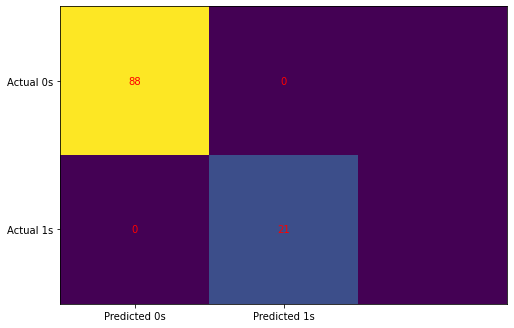

In [113]:
cm = confusion_matrix(y_pred, logistic_regression.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

AssertionError: arrays and names must have the same length

In [119]:
df_football_1920 = pd.read_csv('season-1920.csv')
df_football_1920 = df_football_1920.filter(items = ['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HR', 'AR'])

NameError: name 'df_football_1819' is not defined

In [41]:
team_names = df_football_1920.drop_duplicates(subset = ['HomeTeam'])['HomeTeam']
print(team_names)

team_names = np.array(team_names)

print(team_names)

0            Liverpool
1             West Ham
2          Bournemouth
3              Burnley
4       Crystal Palace
5              Watford
6            Tottenham
7            Leicester
8            Newcastle
9           Man United
10             Arsenal
11         Aston Villa
12            Brighton
13             Everton
14             Norwich
15         Southampton
16            Man City
17    Sheffield United
18             Chelsea
19              Wolves
Name: HomeTeam, dtype: object
['Liverpool' 'West Ham' 'Bournemouth' 'Burnley' 'Crystal Palace' 'Watford'
 'Tottenham' 'Leicester' 'Newcastle' 'Man United' 'Arsenal' 'Aston Villa'
 'Brighton' 'Everton' 'Norwich' 'Southampton' 'Man City'
 'Sheffield United' 'Chelsea' 'Wolves']


In [42]:
df_football_1920_ManU_home = df_football_1920.loc[(df_football_1920.HomeTeam == "Man United")]
df_football_1920_ManU_away = df_football_1920.loc[(df_football_1920.AwayTeam == "Man United")]

df_football_1920_Bour_home = df_football_1920.loc[(df_football_1920.HomeTeam == "Bournemouth")]
df_football_1920_Bour_away = df_football_1920.loc[(df_football_1920.AwayTeam == "Bournemouth")]

df_football_1920_Nor_home = df_football_1920.loc[(df_football_1920.HomeTeam == "Norwich")]
df_football_1920_Nor_away = df_football_1920.loc[(df_football_1920.AwayTeam == "Norwich")]

df_football_1920_Ast_home = df_football_1920.loc[(df_football_1920.HomeTeam == "Aston Villa")]
df_football_1920_Ast_away = df_football_1920.loc[(df_football_1920.AwayTeam == "Aston Villa")]

df_football_1920_New_home = df_football_1920.loc[(df_football_1920.HomeTeam == "Newcastle")]
df_football_1920_New_away = df_football_1920.loc[(df_football_1920.AwayTeam == "Newcastle")]

df_football_1920_Wat_home = df_football_1920.loc[(df_football_1920.HomeTeam == "Watford")]
df_football_1920_Wat_away = df_football_1920.loc[(df_football_1920.AwayTeam == "Watford")]

df_football_1920_Wol_home = df_football_1920.loc[(df_football_1920.HomeTeam == "Wolves")]
df_football_1920_Wol_away = df_football_1920.loc[(df_football_1920.AwayTeam == "Wolves")]

df_football_1920_Ars_home = df_football_1920.loc[(df_football_1920.HomeTeam == "Arsenal")]
df_football_1920_Ars_away = df_football_1920.loc[(df_football_1920.AwayTeam == "Arsenal")]

df_football_1920_Liv_home = df_football_1920.loc[(df_football_1920.HomeTeam == "Liverpool")]
df_football_1920_Liv_away = df_football_1920.loc[(df_football_1920.AwayTeam == "Liverpool")]

df_football_1920_Sou_home = df_football_1920.loc[(df_football_1920.HomeTeam == "Southampton")]
df_football_1920_Sou_away = df_football_1920.loc[(df_football_1920.AwayTeam == "Southampton")]

df_football_1920_Shef_home = df_football_1920.loc[(df_football_1920.HomeTeam == "Sheffield United")]
df_football_1920_Shef_away = df_football_1920.loc[(df_football_1920.AwayTeam == "Sheffield United")]

df_football_1920_Che_home = df_football_1920.loc[(df_football_1920.HomeTeam == "Chelsea")]
df_football_1920_Che_away = df_football_1920.loc[(df_football_1920.AwayTeam == "Chelsea")]

df_football_1920_Eve_home = df_football_1920.loc[(df_football_1920.HomeTeam == "Everton")]
df_football_1920_Eve_away = df_football_1920.loc[(df_football_1920.AwayTeam == "Everton")]

df_football_1920_Lei_home = df_football_1920.loc[(df_football_1920.HomeTeam == "Leicester")]
df_football_1920_Lei_away = df_football_1920.loc[(df_football_1920.AwayTeam == "Leicester")]

df_football_1920_Tot_home = df_football_1920.loc[(df_football_1920.HomeTeam == "Tottenham")]
df_football_1920_Tot_away = df_football_1920.loc[(df_football_1920.AwayTeam == "Tottenham")]

df_football_1920_WHam_home = df_football_1920.loc[(df_football_1920.HomeTeam == "West Ham")]
df_football_1920_WHam_away = df_football_1920.loc[(df_football_1920.AwayTeam == "West Ham")]

df_football_1920_Bton_home = df_football_1920.loc[(df_football_1920.HomeTeam == "Brighton")]
df_football_1920_Bton_away = df_football_1920.loc[(df_football_1920.AwayTeam == "Brighton")]

df_football_1920_Bley_home = df_football_1920.loc[(df_football_1920.HomeTeam == "Burnley")]
df_football_1920_Bley_away = df_football_1920.loc[(df_football_1920.AwayTeam == "Burnley")]

df_football_1920_ManC_home = df_football_1920.loc[(df_football_1920.HomeTeam == "Man City")]
df_football_1920_ManC_away = df_football_1920.loc[(df_football_1920.AwayTeam == "Man City")]

df_football_1920_CP_home = df_football_1920.loc[(df_football_1920.HomeTeam == "Crystal Palace")]
df_football_1920_CP_away = df_football_1920.loc[(df_football_1920.AwayTeam == "Crystal Palace")]

In [43]:
xManUH1920 = np.array(df_football_1920_ManU_home['FTR'])
xManUA1920 = np.array(df_football_1920_ManU_away['FTR'])

xBourH1920 = np.array(df_football_1920_Bour_home['FTR'])
xBourA1920 = np.array(df_football_1920_Bour_away['FTR'])

xNorH1920 = np.array(df_football_1920_Nor_home['FTR'])
xNorA1920 = np.array(df_football_1920_Nor_away['FTR'])

xAstH1920 = np.array(df_football_1920_Ast_home['FTR'])
xAstA1920 = np.array(df_football_1920_Ast_away['FTR'])

xNewH1920 = np.array(df_football_1920_New_home['FTR'])
xNewA1920 = np.array(df_football_1920_New_away['FTR'])

xWatH1920 = np.array(df_football_1920_Wat_home['FTR'])
xWatA1920 = np.array(df_football_1920_Wat_away['FTR'])

xWolH1920 = np.array(df_football_1920_Wol_home['FTR'])
xWolA1920 = np.array(df_football_1920_Wol_away['FTR'])

xArsH1920 = np.array(df_football_1920_Ars_home['FTR'])
xArsA1920 = np.array(df_football_1920_Ars_away['FTR'])

xLivH1920 = np.array(df_football_1920_Liv_home['FTR'])
xLivA1920 = np.array(df_football_1920_Liv_away['FTR'])

xSouH1920 = np.array(df_football_1920_Sou_home['FTR'])
xSouA1920 = np.array(df_football_1920_Sou_away['FTR'])

xShefH1920 = np.array(df_football_1920_Shef_home['FTR'])
xShefA1920 = np.array(df_football_1920_Shef_away['FTR'])

xCheH1920 = np.array(df_football_1920_Che_home['FTR'])
xCheA1920 = np.array(df_football_1920_Che_away['FTR'])

xEveH1920 = np.array(df_football_1920_Eve_home['FTR'])
xEveA1920 = np.array(df_football_1920_Eve_away['FTR'])

xLeiH1920 = np.array(df_football_1920_Lei_home['FTR'])
xLeiA1920 = np.array(df_football_1920_Lei_away['FTR'])

xTotH1920 = np.array(df_football_1920_Tot_home['FTR'])
xTotA1920 = np.array(df_football_1920_Tot_away['FTR'])


xWHamH1920 = np.array(df_football_1920_WHam_home['FTR'])
xWHamA1920 = np.array(df_football_1920_WHam_away['FTR'])

xBtonH1920 = np.array(df_football_1920_Bton_home['FTR'])
xBtonA1920 = np.array(df_football_1920_Bton_away['FTR'])

xBleyH1920 = np.array(df_football_1920_Bley_home['FTR'])
xBleyA1920 = np.array(df_football_1920_Bley_away['FTR'])

xManCH1920 = np.array(df_football_1920_ManC_home['FTR'])
xManCA1920 = np.array(df_football_1920_ManC_away['FTR'])

xCPH1920 = np.array(df_football_1920_CP_home['FTR'])
xCPA1920 = np.array(df_football_1920_CP_away['FTR'])

print(xNorH1920)
print(xNorA1920)

['H' 'A' 'H' 'A' 'A' 'A' 'D' 'A' 'A' 'D' 'D' 'H' 'A' 'H' 'A' 'A' 'A' 'A'
 'A']
['H' 'H' 'H' 'H' 'D' 'H' 'A' 'H' 'D' 'H' 'H' 'H' 'D' 'H' 'H' 'H' 'H' 'H'
 'H']


In [44]:
xManUH1920 = np.array(df_football_1920_ManU_home['FTR'])
xManUA1920 = np.array(df_football_1920_ManU_away['FTR'])

yManU1920 = []

for i in xManUH1920:
    if i == 'H':
        yManU1920.append(1)
    elif i == 'A': 
        yManU1920.append(-1)
    elif i == 'D':
        yManU1920.append(0)

        
for i in xManUA1920:
    if i == 'H':
        yManU1920.append(-1)
    elif i == 'A': 
        yManU1920.append(1)
    elif i == 'D':
        yManU1920.append(0)
        
print(xManUH1920)
print(xManUA1920)
print(yManU1920)


['H' 'A' 'H' 'D' 'D' 'H' 'D' 'H' 'D' 'H' 'H' 'A' 'D' 'H' 'H' 'H' 'H' 'D'
 'D']
['D' 'D' 'H' 'H' 'A' 'H' 'D' 'A' 'H' 'A' 'H' 'H' 'A' 'D' 'D' 'A' 'A' 'A'
 'A']
[1, -1, 1, 0, 0, 1, 0, 1, 0, 1, 1, -1, 0, 1, 1, 1, 1, 0, 0, 0, 0, -1, -1, 1, -1, 0, 1, -1, 1, -1, -1, 1, 0, 0, 1, 1, 1, 1]


In [45]:
xBourH1920 = np.array(df_football_1920_Bour_home['FTR'])
xBourA1920 = np.array(df_football_1920_Bour_away['FTR'])

yBour1920 = []

for i in xBourH1920:
    if i == 'H':
        yBour1920.append(1)
    elif i == 'A': 
        yBour1920.append(-1)
    elif i == 'D':
        yBour1920.append(0)

        
for i in xBourA1920:
    if i == 'H':
        yBour1920.append(-1)
    elif i == 'A': 
        yBour1920.append(1)
    elif i == 'D':
        yBour1920.append(0)
        
print(xBourH1920)
print(xBourA1920)
print(yBour1920)

['D' 'A' 'H' 'D' 'D' 'H' 'A' 'A' 'A' 'D' 'A' 'H' 'H' 'D' 'A' 'A' 'D' 'H'
 'A']
['A' 'H' 'A' 'H' 'D' 'H' 'H' 'H' 'A' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H'
 'A']
[0, -1, 1, 0, 0, 1, -1, -1, -1, 0, -1, 1, 1, 0, -1, -1, 0, 1, -1, 1, -1, 1, -1, 0, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1]


In [46]:
xNorH1920 = np.array(df_football_1920_Nor_home['FTR'])
xNorA1920 = np.array(df_football_1920_Nor_away['FTR'])

yNor1920 = []

for i in xNorH1920:
    if i == 'H':
        yNor1920.append(1)
    elif i == 'A': 
        yNor1920.append(-1)
    elif i == 'D':
        yNor1920.append(0)

        
for i in xNorA1920:
    if i == 'H':
        yNor1920.append(-1)
    elif i == 'A': 
        yNor1920.append(1)
    elif i == 'D':
        yNor1920.append(0)
        
print(xNorH1920)
print(xNorA1920)
print(yNor1920)

['H' 'A' 'H' 'A' 'A' 'A' 'D' 'A' 'A' 'D' 'D' 'H' 'A' 'H' 'A' 'A' 'A' 'A'
 'A']
['H' 'H' 'H' 'H' 'D' 'H' 'A' 'H' 'D' 'H' 'H' 'H' 'D' 'H' 'H' 'H' 'H' 'H'
 'H']
[1, -1, 1, -1, -1, -1, 0, -1, -1, 0, 0, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, 1, -1, 0, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1]


In [47]:
xAstH1920 = np.array(df_football_1920_Ast_home['FTR'])
xAstA1920 = np.array(df_football_1920_Ast_away['FTR'])

yAst1920 = []

for i in xAstH1920:
    if i == 'H':
        yAst1920.append(1)
    elif i == 'A': 
        yAst1920.append(-1)
    elif i == 'D':
        yAst1920.append(0)

        
for i in xAstA1920:
    if i == 'H':
        yAst1920.append(-1)
    elif i == 'A': 
        yAst1920.append(1)
    elif i == 'D':
        yAst1920.append(0)
        
print(xAstH1920)
print(xAstA1920)
print(yAst1920)

['A' 'H' 'D' 'D' 'H' 'A' 'H' 'A' 'A' 'H' 'A' 'H' 'A' 'D' 'A' 'A' 'A' 'H'
 'H']
['H' 'H' 'H' 'A' 'H' 'H' 'D' 'H' 'H' 'H' 'A' 'D' 'H' 'H' 'H' 'D' 'H' 'D'
 'D']
[-1, 1, 0, 0, 1, -1, 1, -1, -1, 1, -1, 1, -1, 0, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 0, -1, -1, -1, 1, 0, -1, -1, -1, 0, -1, 0, 0]


In [48]:
xNewH1920 = np.array(df_football_1920_New_home['FTR'])
xNewA1920 = np.array(df_football_1920_New_away['FTR'])

yNew1920 = []

for i in xNewH1920:
    if i == 'H':
        yNew1920.append(1)
    elif i == 'A': 
        yNew1920.append(-1)
    elif i == 'D':
        yNew1920.append(0)

        
for i in xNewA1920:
    if i == 'H':
        yNew1920.append(-1)
    elif i == 'A': 
        yNew1920.append(1)
    elif i == 'D':
        yNew1920.append(0)
        
print(xNewH1920)
print(xNewA1920)
print(yNew1920)

['A' 'D' 'D' 'H' 'D' 'H' 'D' 'H' 'H' 'A' 'A' 'H' 'D' 'D' 'H' 'D' 'D' 'A'
 'A']
['H' 'A' 'H' 'H' 'H' 'A' 'H' 'A' 'H' 'H' 'D' 'D' 'H' 'H' 'A' 'A' 'H' 'H'
 'D']
[-1, 0, 0, 1, 0, 1, 0, 1, 1, -1, -1, 1, 0, 0, 1, 0, 0, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 0, 0, -1, -1, 1, 1, -1, -1, 0]


In [49]:
xWatH1920 = np.array(df_football_1920_Wat_home['FTR'])
xWatA1920 = np.array(df_football_1920_Wat_away['FTR'])

yWat1920 = []

for i in xWatH1920:
    if i == 'H':
        yWat1920.append(1)
    elif i == 'A': 
        yWat1920.append(-1)
    elif i == 'D':
        yWat1920.append(0)

        
for i in xWatA1920:
    if i == 'H':
        yWat1920.append(-1)
    elif i == 'A': 
        yWat1920.append(1)
    elif i == 'D':
        yWat1920.append(0)
        
print(xWatH1920)
print(xWatA1920)
print(yWat1920)

['A' 'A' 'D' 'D' 'D' 'A' 'A' 'D' 'H' 'H' 'H' 'D' 'A' 'H' 'D' 'A' 'H' 'H'
 'A']
['H' 'D' 'H' 'H' 'D' 'A' 'H' 'H' 'H' 'D' 'A' 'H' 'D' 'H' 'H' 'H' 'H' 'H'
 'H']
[-1, -1, 0, 0, 0, -1, -1, 0, 1, 1, 1, 0, -1, 1, 0, -1, 1, 1, -1, -1, 0, -1, -1, 0, 1, -1, -1, -1, 0, 1, -1, 0, -1, -1, -1, -1, -1, -1]


In [50]:
xWolH1920 = np.array(df_football_1920_Wol_home['FTR'])
xWolA1920 = np.array(df_football_1920_Wol_away['FTR'])

yWol1920 = []

for i in xWolH1920:
    if i == 'H':
        yWol1920.append(1)
    elif i == 'A': 
        yWol1920.append(-1)
    elif i == 'D':
        yWol1920.append(0)

        
for i in xWolA1920:
    if i == 'H':
        yWol1920.append(-1)
    elif i == 'A': 
        yWol1920.append(1)
    elif i == 'D':
        yWol1920.append(0)
        
print(xWolH1920)
print(xWolA1920)
print(yWol1920)

['D' 'D' 'A' 'H' 'D' 'H' 'D' 'H' 'A' 'H' 'D' 'A' 'D' 'H' 'D' 'H' 'A' 'H'
 'H']
['D' 'H' 'D' 'A' 'D' 'D' 'A' 'D' 'A' 'H' 'H' 'A' 'D' 'A' 'A' 'A' 'H' 'D'
 'H']
[0, 0, -1, 1, 0, 1, 0, 1, -1, 1, 0, -1, 0, 1, 0, 1, -1, 1, 1, 0, -1, 0, 1, 0, 0, 1, 0, 1, -1, -1, 1, 0, 1, 1, 1, -1, 0, -1]


In [51]:
xArsH1920 = np.array(df_football_1920_Ars_home['FTR'])
xArsA1920 = np.array(df_football_1920_Ars_away['FTR'])

yArs1920 = []

for i in xArsH1920:
    if i == 'H':
        yArs1920.append(1)
    elif i == 'A': 
        yArs1920.append(-1)
    elif i == 'D':
        yArs1920.append(0)

        
for i in xArsA1920:
    if i == 'H':
        yArs1920.append(-1)
    elif i == 'A': 
        yArs1920.append(1)
    elif i == 'D':
        yArs1920.append(0)
        
print(xArsH1920)
print(xArsA1920)
print(yArs1920)

['H' 'D' 'H' 'H' 'D' 'D' 'D' 'A' 'A' 'A' 'H' 'D' 'H' 'H' 'H' 'H' 'D' 'H'
 'H']
['A' 'H' 'D' 'D' 'H' 'H' 'D' 'A' 'D' 'D' 'D' 'D' 'D' 'H' 'H' 'A' 'A' 'H'
 'H']
[1, 0, 1, 1, 0, 0, 0, -1, -1, -1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, -1, 0, 0, -1, -1, 0, 1, 0, 0, 0, 0, 0, -1, -1, 1, 1, -1, -1]


In [52]:
xLivH1920 = np.array(df_football_1920_Liv_home['FTR'])
xLivA1920 = np.array(df_football_1920_Liv_away['FTR'])

yLiv1920 = []

for i in xLivH1920:
    if i == 'H':
        yLiv1920.append(1)
    elif i == 'A': 
        yLiv1920.append(-1)
    elif i == 'D':
        yLiv1920.append(0)

        
for i in xLivA1920:
    if i == 'H':
        yLiv1920.append(-1)
    elif i == 'A': 
        yLiv1920.append(1)
    elif i == 'D':
        yLiv1920.append(0)
        
print(xLivH1920)
print(xLivA1920)
print(yLiv1920)

['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'D'
 'H']
['A' 'A' 'A' 'A' 'D' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'H' 'D' 'H' 'A' 'H'
 'A']
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, -1, 0, -1, 1, -1, 1]


In [53]:
xSouH1920 = np.array(df_football_1920_Sou_home['FTR'])
xSouA1920 = np.array(df_football_1920_Sou_away['FTR'])

ySou1920 = []

for i in xSouH1920:
    if i == 'H':
        ySou1920.append(1)
    elif i == 'A': 
        ySou1920.append(-1)
    elif i == 'D':
        ySou1920.append(0)

        
for i in xSouA1920:
    if i == 'H':
        ySou1920.append(-1)
    elif i == 'A': 
        ySou1920.append(1)
    elif i == 'D':
        ySou1920.append(0)
        
print(xSouH1920)
print(xSouA1920)
print(ySou1920)

['A' 'D' 'A' 'A' 'A' 'A' 'H' 'H' 'A' 'D' 'H' 'A' 'A' 'H' 'A' 'A' 'H' 'D'
 'H']
['H' 'A' 'A' 'H' 'D' 'H' 'D' 'H' 'A' 'A' 'A' 'A' 'H' 'H' 'A' 'A' 'D' 'D'
 'A']
[-1, 0, -1, -1, -1, -1, 1, 1, -1, 0, 1, -1, -1, 1, -1, -1, 1, 0, 1, -1, 1, 1, -1, 0, -1, 0, -1, 1, 1, 1, 1, -1, -1, 1, 1, 0, 0, 1]


In [54]:
xShefH1920 = np.array(df_football_1920_Shef_home['FTR'])
xShefA1920 = np.array(df_football_1920_Shef_away['FTR'])

yShef1920 = []

for i in xShefH1920:
    if i == 'H':
        yShef1920.append(1)
    elif i == 'A': 
        yShef1920.append(-1)
    elif i == 'D':
        yShef1920.append(0)

        
for i in xShefA1920:
    if i == 'H':
        yShef1920.append(-1)
    elif i == 'A': 
        yShef1920.append(1)
    elif i == 'D':
        yShef1920.append(0)
        
print(xShefH1920)
print(xShefA1920)
print(yShef1920)

['H' 'A' 'A' 'A' 'H' 'H' 'D' 'A' 'H' 'D' 'H' 'A' 'H' 'D' 'H' 'H' 'H' 'H'
 'A']
['D' 'D' 'A' 'D' 'D' 'D' 'D' 'A' 'A' 'H' 'H' 'D' 'A' 'D' 'H' 'H' 'D' 'H'
 'H']
[1, -1, -1, -1, 1, 1, 0, -1, 1, 0, 1, -1, 1, 0, 1, 1, 1, 1, -1, 0, 0, 1, 0, 0, 0, 0, 1, 1, -1, -1, 0, 1, 0, -1, -1, 0, -1, -1]


In [55]:
xCheH1920 = np.array(df_football_1920_Che_home['FTR'])
xCheA1920 = np.array(df_football_1920_Che_away['FTR'])

yChe1920 = []

for i in xCheH1920:
    if i == 'H':
        yChe1920.append(1)
    elif i == 'A': 
        yChe1920.append(-1)
    elif i == 'D':
        yChe1920.append(0)

        
for i in xCheA1920:
    if i == 'H':
        yChe1920.append(-1)
    elif i == 'A': 
        yChe1920.append(1)
    elif i == 'D':
        yChe1920.append(0)
        
print(xCheH1920)
print(xCheA1920)
print(yChe1920)

['D' 'D' 'A' 'H' 'H' 'H' 'A' 'H' 'A' 'A' 'H' 'D' 'A' 'H' 'H' 'H' 'H' 'H'
 'H']
['H' 'A' 'A' 'A' 'A' 'A' 'H' 'H' 'A' 'A' 'D' 'H' 'D' 'D' 'A' 'H' 'A' 'H'
 'H']
[0, 0, -1, 1, 1, 1, -1, 1, -1, -1, 1, 0, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 0, -1, 0, 0, 1, -1, 1, -1, -1]


In [56]:
xEveH1920 = np.array(df_football_1920_Eve_home['FTR'])
xEveA1920 = np.array(df_football_1920_Eve_away['FTR'])

yEve1920 = []

for i in xEveH1920:
    if i == 'H':
        yEve1920.append(1)
    elif i == 'A': 
        yEve1920.append(-1)
    elif i == 'D':
        yEve1920.append(0)

        
for i in xNorA1920:
    if i == 'H':
        yEve1920.append(-1)
    elif i == 'A': 
        yEve1920.append(1)
    elif i == 'D':
        yEve1920.append(0)
        
print(xEveH1920)
print(xEveA1920)
print(yEve1920)

['H' 'H' 'A' 'A' 'H' 'D' 'A' 'H' 'D' 'H' 'H' 'D' 'H' 'D' 'D' 'H' 'D' 'D'
 'A']
['D' 'H' 'H' 'H' 'H' 'A' 'H' 'H' 'D' 'A' 'H' 'D' 'A' 'H' 'H' 'A' 'H' 'H'
 'A']
[1, 1, -1, -1, 1, 0, -1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, -1, -1, -1, -1, -1, 0, -1, 1, -1, 0, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1]


In [57]:
xLeiH1920 = np.array(df_football_1920_Lei_home['FTR'])
xLeiA1920 = np.array(df_football_1920_Lei_away['FTR'])

yLei1920 = []

for i in xLeiH1920:
    if i == 'H':
        yLei1920.append(1)
    elif i == 'A': 
        yLei1920.append(-1)
    elif i == 'D':
        yLei1920.append(0)

        
for i in xLeiA1920:
    if i == 'H':
        yLei1920.append(-1)
    elif i == 'A': 
        yLei1920.append(1)
    elif i == 'D':
        yLei1920.append(0)
        
print(xLeiH1920)
print(xLeiA1920)
print(yLei1920)

['D' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'D' 'A' 'A' 'H' 'D' 'A' 'H' 'D' 'H' 'H'
 'A']
['D' 'A' 'H' 'H' 'A' 'A' 'A' 'A' 'H' 'A' 'A' 'H' 'D' 'H' 'D' 'H' 'D' 'H'
 'H']
[0, 1, 1, 1, 1, 1, 1, 1, 0, -1, -1, 1, 0, -1, 1, 0, 1, 1, -1, 0, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 0, -1, 0, -1, 0, -1, -1]


In [58]:
xTotH1920 = np.array(df_football_1920_Tot_home['FTR'])
xTotA1920 = np.array(df_football_1920_Tot_away['FTR'])

yTot1920 = []

for i in xTotH1920:
    if i == 'H':
        yTot1920.append(1)
    elif i == 'A': 
        yTot1920.append(-1)
    elif i == 'D':
        yTot1920.append(0)

        
for i in xTotA1920:
    if i == 'H':
        yTot1920.append(-1)
    elif i == 'A': 
        yTot1920.append(1)
    elif i == 'D':
        yTot1920.append(0)
        
print(xTotH1920)
print(xTotA1920)
print(yTot1920)

['H' 'A' 'H' 'H' 'D' 'D' 'H' 'H' 'A' 'H' 'A' 'H' 'H' 'A' 'D' 'H' 'H' 'H'
 'H']
['D' 'D' 'H' 'H' 'H' 'D' 'A' 'H' 'A' 'D' 'H' 'D' 'A' 'H' 'D' 'H' 'D' 'A'
 'D']
[1, -1, 1, 1, 0, 0, 1, 1, -1, 1, -1, 1, 1, -1, 0, 1, 1, 1, 1, 0, 0, -1, -1, -1, 0, 1, -1, 1, 0, -1, 0, 1, -1, 0, -1, 0, 1, 0]


In [59]:
xNorH1920 = np.array(df_football_1920_Nor_home['FTR'])
xNorA1920 = np.array(df_football_1920_Nor_away['FTR'])

yNor1920 = []

for i in xNorH1920:
    if i == 'H':
        yNor1920.append(1)
    elif i == 'A': 
        yNor1920.append(-1)
    elif i == 'D':
        yNor1920.append(0)

        
for i in xNorA1920:
    if i == 'H':
        yNor1920.append(-1)
    elif i == 'A': 
        yNor1920.append(1)
    elif i == 'D':
        yNor1920.append(0)
        
print(xNorH1920)
print(xNorA1920)
print(yNor1920)

['H' 'A' 'H' 'A' 'A' 'A' 'D' 'A' 'A' 'D' 'D' 'H' 'A' 'H' 'A' 'A' 'A' 'A'
 'A']
['H' 'H' 'H' 'H' 'D' 'H' 'A' 'H' 'D' 'H' 'H' 'H' 'D' 'H' 'H' 'H' 'H' 'H'
 'H']
[1, -1, 1, -1, -1, -1, 0, -1, -1, 0, 0, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, 1, -1, 0, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1]


In [60]:
xWHamH1920 = np.array(df_football_1920_WHam_home['FTR'])
xWHamA1920 = np.array(df_football_1920_WHam_away['FTR'])

yWHam1920 = []

for i in xWHamH1920:
    if i == 'H':
        yWHam1920.append(1)
    elif i == 'A': 
        yWHam1920.append(-1)
    elif i == 'D':
        yWHam1920.append(0)

        
for i in xWHamA1920:
    if i == 'H':
        yWHam1920.append(-1)
    elif i == 'A': 
        yWHam1920.append(1)
    elif i == 'D':
        yWHam1920.append(0)
        
print(xWHamH1920)
print(xWHamA1920)
print(yWHam1920)

['A' 'H' 'H' 'A' 'D' 'A' 'A' 'A' 'A' 'H' 'D' 'A' 'D' 'H' 'A' 'H' 'A' 'H'
 'D']
['D' 'A' 'D' 'D' 'H' 'H' 'A' 'H' 'A' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'D' 'A'
 'D']
[-1, 1, 1, -1, 0, -1, -1, -1, -1, 1, 0, -1, 0, 1, -1, 1, -1, 1, 0, 0, 1, 0, 0, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 0, 1, 0]


In [61]:
xBtonH1920 = np.array(df_football_1920_Bton_home['FTR'])
xBtonA1920 = np.array(df_football_1920_Bton_away['FTR'])

yBton1920 = []

for i in xBtonH1920:
    if i == 'H':
        yBton1920.append(1)
    elif i == 'A': 
        yBton1920.append(-1)
    elif i == 'D':
        yBton1920.append(0)

        
for i in xBtonA1920:
    if i == 'H':
        yBton1920.append(-1)
    elif i == 'A': 
        yBton1920.append(1)
    elif i == 'D':
        yBton1920.append(0)
        
print(xBtonH1920)
print(xBtonA1920)
print(yBton1920)

['D' 'A' 'D' 'H' 'H' 'H' 'A' 'D' 'A' 'H' 'D' 'D' 'D' 'A' 'H' 'A' 'A' 'A'
 'D']
['A' 'H' 'D' 'H' 'H' 'H' 'H' 'A' 'D' 'H' 'H' 'H' 'D' 'D' 'D' 'D' 'A' 'D'
 'A']
[0, -1, 0, 1, 1, 1, -1, 0, -1, 1, 0, 0, 0, -1, 1, -1, -1, -1, 0, 1, -1, 0, -1, -1, -1, -1, 1, 0, -1, -1, -1, 0, 0, 0, 0, 1, 0, 1]


In [62]:
xBleyH1920 = np.array(df_football_1920_Bley_home['FTR'])
xBleyA1920 = np.array(df_football_1920_Bley_away['FTR'])

yBley1920 = []

for i in xBleyH1920:
    if i == 'H':
        yBley1920.append(1)
    elif i == 'A': 
        yBley1920.append(-1)
    elif i == 'D':
        yBley1920.append(0)

        
for i in xBleyA1920:
    if i == 'H':
        yBley1920.append(1)
    elif i == 'A': 
        yBley1920.append(-1)
    elif i == 'D':
        yBley1920.append(0)
        
print(xBleyH1920)
print(xBleyA1920)
print(yBley1920)

['H' 'A' 'H' 'H' 'A' 'H' 'A' 'A' 'H' 'A' 'A' 'H' 'D' 'H' 'D' 'H' 'D' 'D'
 'A']
['H' 'D' 'D' 'D' 'H' 'H' 'A' 'H' 'A' 'H' 'H' 'A' 'A' 'D' 'H' 'A' 'A' 'D'
 'A']
[1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 0, 1, 0, 1, 0, 0, -1, 1, 0, 0, 0, 1, 1, -1, 1, -1, 1, 1, -1, -1, 0, 1, -1, -1, 0, -1]


In [63]:
xManCH1920 = np.array(df_football_1920_ManC_home['FTR'])
xManCA1920 = np.array(df_football_1920_ManC_away['FTR'])

yManC1920 = []

for i in xManCH1920:
    if i == 'H':
        yManC1920.append(1)
    elif i == 'A': 
        yManC1920.append(-1)
    elif i == 'D':
        yManC1920.append(0)

        
for i in xManCA1920:
    if i == 'H':
        yManC1920.append(1)
    elif i == 'A': 
        yManC1920.append(-1)
    elif i == 'D':
        yManC1920.append(0)
        
print(xManCH1920)
print(xManCA1920)
print(yManC1920)

['D' 'H' 'H' 'A' 'H' 'H' 'H' 'A' 'H' 'H' 'H' 'D' 'H' 'H' 'H' 'H' 'H' 'H'
 'H']
['A' 'A' 'H' 'A' 'A' 'H' 'D' 'A' 'A' 'H' 'A' 'A' 'H' 'A' 'H' 'H' 'H' 'A'
 'A']
[0, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 0, -1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, -1]


In [64]:
xCPH1920 = np.array(df_football_1920_CP_home['FTR'])
xCPA1920 = np.array(df_football_1920_CP_away['FTR'])

yCP1920 = []

for i in xCPH1920:
    if i == 'H':
        yCP1920.append(1)
    elif i == 'A': 
        yCP1920.append(-1)
    elif i == 'D':
        yCP1920.append(0)

        
for i in xCPA1920:
    if i == 'H':
        yCP1920.append(1)
    elif i == 'A': 
        yCP1920.append(-1)
    elif i == 'D':
        yCP1920.append(0)
        
print(xCPH1920)
print(xCPA1920)
print(yCP1920)

['D' 'H' 'D' 'H' 'A' 'A' 'A' 'H' 'D' 'H' 'D' 'A' 'A' 'H' 'H' 'A' 'A' 'A'
 'D']
['H' 'A' 'H' 'A' 'D' 'H' 'A' 'D' 'H' 'D' 'D' 'D' 'H' 'A' 'A' 'H' 'H' 'H'
 'H']
[0, 1, 0, 1, -1, -1, -1, 1, 0, 1, 0, -1, -1, 1, 1, -1, -1, -1, 0, 1, -1, 1, -1, 0, 1, -1, 0, 1, 0, 0, 0, 1, -1, -1, 1, 1, 1, 1]


In [65]:
frames = [df_football_1920_Ars_home, df_football_1920_Ars_away]
frames1 = [df_football_1920_ManU_home, df_football_1920_ManU_away,
           df_football_1920_Bour_home, df_football_1920_Bour_away,
           df_football_1920_Nor_home, df_football_1920_Nor_away,
           df_football_1920_Ast_home, df_football_1920_Ast_away,
           df_football_1920_New_home, df_football_1920_New_away,
           df_football_1920_Wat_home, df_football_1920_Wat_away,
           df_football_1920_Wol_home, df_football_1920_Wol_away,
           df_football_1920_Ars_home, df_football_1920_Ars_away,
           df_football_1920_Liv_home, df_football_1920_Liv_away,
           df_football_1920_Sou_home, df_football_1920_Sou_away,
           df_football_1920_Shef_home, df_football_1920_Shef_away,
           df_football_1920_Che_home, df_football_1920_Che_away,
           df_football_1920_Eve_home, df_football_1920_Eve_away,
           df_football_1920_Lei_home, df_football_1920_Lei_away,
           df_football_1920_Tot_home, df_football_1920_Tot_away,
           df_football_1920_WHam_home, df_football_1920_WHam_away,
           df_football_1920_Bton_home, df_football_1920_Bton_away,
           df_football_1920_Bley_home, df_football_1920_Bley_away,
           df_football_1920_ManC_home, df_football_1920_ManC_away,
           df_football_1920_CP_home, df_football_1920_CP_away]
           
df_football_1920_allteams = pd.concat(frames1)
df_football_1920_Ars = pd.concat(frames)
yTeams1920 = yManU1920 + yBour1920 + yNor1920 + yAst1920 + yNew1920 + yWat1920 + yWol1920 + yArs1920 + yLiv1920 + ySou1920 + yShef1920 + yChe1920 + yEve1920 + yLei1920 + yTot1920 + yWHam1920 + yBton1920 + yBley1920 + yManC1920 + yCP1920
print(yTeams1920)


[1, -1, 1, 0, 0, 1, 0, 1, 0, 1, 1, -1, 0, 1, 1, 1, 1, 0, 0, 0, 0, -1, -1, 1, -1, 0, 1, -1, 1, -1, -1, 1, 0, 0, 1, 1, 1, 1, 0, -1, 1, 0, 0, 1, -1, -1, -1, 0, -1, 1, 1, 0, -1, -1, 0, 1, -1, 1, -1, 1, -1, 0, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, -1, 0, -1, -1, 0, 0, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, 1, -1, 0, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, 1, 0, 0, 1, -1, 1, -1, -1, 1, -1, 1, -1, 0, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 0, -1, -1, -1, 1, 0, -1, -1, -1, 0, -1, 0, 0, -1, 0, 0, 1, 0, 1, 0, 1, 1, -1, -1, 1, 0, 0, 1, 0, 0, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 0, 0, -1, -1, 1, 1, -1, -1, 0, -1, -1, 0, 0, 0, -1, -1, 0, 1, 1, 1, 0, -1, 1, 0, -1, 1, 1, -1, -1, 0, -1, -1, 0, 1, -1, -1, -1, 0, 1, -1, 0, -1, -1, -1, -1, -1, -1, 0, 0, -1, 1, 0, 1, 0, 1, -1, 1, 0, -1, 0, 1, 0, 1, -1, 1, 1, 0, -1, 0, 1, 0, 0, 1, 0, 1, -1, -1, 1, 0, 1, 1, 1, -1, 0, -1, 1, 0, 1, 1, 0, 0, 0, -1, -1, -1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, -1, 0, 0, -1, -

In [66]:
X1920 = df_football_1920_allteams[['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HR', 'AR']]
y1920 = yTeams1920

print(X1920)
print(y1920)

     FTHG  FTAG  HTHG  HTAG  HS  AS  HST  AST  HC  AC  HR  AR
9       4     0     1     0  11  18    5    7   3   5   0   0
23      1     2     0     1  22   5    3    3   8   1   0   0
42      1     0     1     0  10   9    5    3   3   9   0   0
69      1     1     1     0  16  10    4    5   8   7   0   0
88      1     1     1     0   7  10    2    4   3   1   0   0
..    ...   ...   ...   ...  ..  ..  ...  ...  ..  ..  ..  ..
295     0     2     0     2  12   7    1    2  11   4   0   0
306     4     0     2     0  21   3    7    0   6   0   0   0
321     3     0     0     0  15   7    4    1   3   7   0   0
346     2     0     1     0  12   9    9    5   5   1   0   1
365     2     0     1     0  11   7    5    3   5   2   0   0

[760 rows x 12 columns]
[1, -1, 1, 0, 0, 1, 0, 1, 0, 1, 1, -1, 0, 1, 1, 1, 1, 0, 0, 0, 0, -1, -1, 1, -1, 0, 1, -1, 1, -1, -1, 1, 0, 0, 1, 1, 1, 1, 0, -1, 1, 0, 0, 1, -1, -1, -1, 0, -1, 1, 1, 0, -1, -1, 0, 1, -1, 1, -1, 1, -1, 0, -1, -1, -1, 1, -1, -1, -1,

In [70]:
logistic_regression1819_12.score(X1920, y1920)

0.4355263157894737

In [82]:
X1920_10 = df_football_1920_allteams[['FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HR', 'AR']]
logistic_regression1819_10.score(X1920_10, y1920)

0.43026315789473685

In [83]:
X1920_8 = df_football_1920_allteams[['FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC']]
logistic_regression8.score(X1920_8, y1920)

0.4328947368421053